## <font color=blue >LSPM demo.
This notebook demos how to train the LSPM model on the CSV dataset files of ***SFC*** stream sensor. If you want to run it on other sensors, just change the parameter of ***--stream_sensor*** and ***--rain_sensor***.

In our dataset, the parameters should be set to:

--stream_sensor **Ross_S_fixed**
--rain_sensor **Ross_R_fixed** 

--stream_sensor **Saratoga_S_fixed** 
--rain_sensor **Saratoga_R_fixed** 

--stream_sensor **UpperPen_S_fixed** 
--rain_sensor **UpperPen_R_fixed** 

--stream_sensor **SFC_S_fixed** 
--rain_sensor **SFC_R_fixed** 

With LSPM, you can build **multi-variate** model, which means you have stream sensor data and nearby rain sensor data.

## <font color=blue >Parameter setting. 

--**stream_sensor**: stream dataset file name. The file should be csv file.

--**rain_sensor**: rain dataset file name. The file should be csv file.

--**train_volume**: train set size.

--**hidden_dim**: hidden dim of lstm layers.

--**cnn_dim**: hidden dim of cnn layers.

--**layer**: number of layers.

--**model**: model name, used to generate the pt file and predicted file names.

--**mode**: set it to 'train' or 'inference' with an existing pt_file.

--**pt_file**: if set, the model will be loaded from this pt file, otherwise check the file according to the assigned parameters.

--**save**: if save the predicted file of testset, set to 1, else 0.

--**outf**: default value is './output', the model will be saved in the train folder in this directory.

## <font color=blue >Train a *multi-variate* model with rain data.

In [ ]:
! python run.py \
--stream_sensor SFC_S_fixed \
--rain_sensor SFC_R_fixed \
--model SFC_07 \
--mode train \
--train_volume 20000 \
--oversampling 120 \
--hidden_dim 400 \
--layer 2 \
--gpu_id 1 

## <font color=blue >Load a trained multi-variate model.

In [3]:
import numpy as np
import random
import imp
from utils.utils2 import *
from run import Options
pt = './output/SFC_07/train/SFC_07.zip'
# get model
model = Options().get_model(pt)

current dir:  /data/hydro/hydro-2/code/LSPM
Importing parameters from:  opt.txt ............
norm is:  [1.38939955e+00 1.42360186e+00 7.20744940e-04 7.35950598e-03]


## <font color=blue >Use test_single to do inferencing on one time-point.

test_point is:  2021-12-16 01:30:00
RMSE:  83.94240609404251
MAPE:  0.9171305494539899


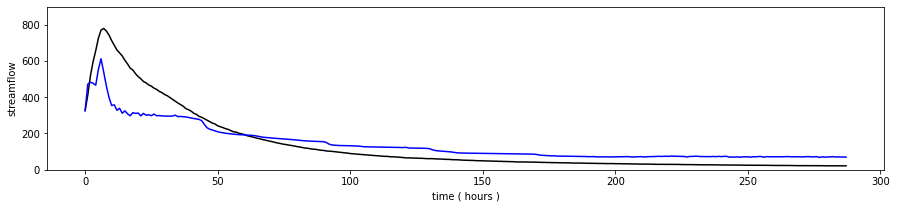

In [9]:
import numpy as np
from utils.utils2 import *
from utils.metric import *
testP=["2021-12-16 01:30:00" ] 
predicted, ground_truth = model.test_single(testP[0])
print("RMSE: ", RMSE(predicted, ground_truth))
print("MAPE: ", MAPE(predicted, ground_truth))
plot(ground_truth, predicted)

## <font color=blue >Inferencing for real-world application.
If you already have test time point, history stream input and rain data input prepared, use ***predict*** function to do it.

In [10]:
import numpy as np
import random
from utils.utils2 import *
from run import Options
from models.LSPM import *
from models.Inference import *
opt = Options().parse()
# model name
pt = './output/SFC_07/train/SFC_07.zip'
# get model
model = Options().get_model(pt)
# get data
testP=["2021-12-16 00:30:00"]   
for i in range(len(testP)):
    stream_data, indicator_data, _ = model.get_data(testP[i])  
    p = model.predict(testP[i], stream_data, indicator_data)
    print("Predicted data: ")
    print(p)

current dir:  /data/hydro/hydro-2/code/LSPM
Importing parameters from:  opt.txt ............
norm is:  [1.38939955e+00 1.42360186e+00 7.20744940e-04 7.35950598e-03]
test_point is:  2021-12-16 00:30:00
Predicted data: 
[126.92107951 175.12308641 147.25317241 155.25941997 170.63626938
 173.08835491 161.12186604 168.52253887 151.3168393  172.45054987
 161.84812915 178.53956215 169.34473299 166.10583555 172.6919727
 169.16472746 177.41440735 174.52393184 187.34567516 181.87129753
 184.2549383  179.26007345 190.77474793 190.25648001 194.90027988
 196.47838606 198.50169555 200.10615143 201.7805599  202.28527141
 205.8834422  201.05505423 202.92955571 202.83032359 203.37628223
 203.45565462 203.72564023 204.09501623 204.15168818 202.70237579
 199.42071427 195.85922716 191.76478828 183.69949136 168.17777594
 157.95971577 154.8079902  153.38498744 152.22331629 151.25708775
 150.39640273 149.57073237 148.72252746 147.6816535  145.99138738
 143.36478881 140.72786943 138.78225176 137.20826131 135.